# Data Science Project: Customer Churn Prediction
#### Popular Python Project - Runs Smoothly Python3

In [3]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy import interp
from collections import defaultdict

In [4]:
df=pd.read_csv('churn.csv')

### Let's explore the first (x) rows of this customer churn dataset

In [5]:
df.head(6)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


### Create a copy and then display the same (x) rows

In [6]:
churn_df = df.copy()

In [7]:
churn_df.head(6)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [8]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

### Data Manipulation
#### Dropping Unwanted Columns 

In [20]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.', 1, 0)

In [24]:
to_drop =['State', 'Area Code', 'Phone', 'Churn?']

churn_feat_space = churn_df.drop(to_drop,axis=1)

In [25]:
# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0.
yes_no_cols = ["Int'l Plan", "VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

### Show Unique Values per Column

In [26]:
# In Python 3.11, the method to_numpy() is used to convert a DataFrame to a NumPy array, and then astype(np.float) is
# used to convert the elements of the array to float data type.
X = churn_feat_space.to_numpy().astype(np.float64)

# scaler is used to preprocess and transform the features in a dataset, 
# typically to bring them to a standard scale
scaler = StandardScaler()


# Scale the features in X
# {scaler.fit} computes the mean and standard deviation for each features
# {.transform} subtracts the mean of that feature and then divides by the standard deviation {mean =0, sd=1}
X = scaler.fit_transform(X)

# Get the column names of the churn_df
features = churn_df.columns

# Loop through each feature in the features list
for feature in features:
    
# Print the feature name and the number of unique values
     print(f'{feature}--->{churn_df[feature].nunique()}')

State--->51
Account Length--->212
Area Code--->3
Phone--->3333
Int'l Plan--->2
VMail Plan--->2
VMail Message--->46
Day Mins--->1667
Day Calls--->119
Day Charge--->1667
Eve Mins--->1611
Eve Calls--->123
Eve Charge--->1440
Night Mins--->1591
Night Calls--->120
Night Charge--->933
Intl Mins--->162
Intl Calls--->21
Intl Charge--->162
CustServ Calls--->10
Churn?--->2


In [27]:
print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


### Show Null Value %

In [28]:
churn_df.isnull().sum() / churn_df.shape[0]

State             0.0
Account Length    0.0
Area Code         0.0
Phone             0.0
Int'l Plan        0.0
VMail Plan        0.0
VMail Message     0.0
Day Mins          0.0
Day Calls         0.0
Day Charge        0.0
Eve Mins          0.0
Eve Calls         0.0
Eve Charge        0.0
Night Mins        0.0
Night Calls       0.0
Night Charge      0.0
Intl Mins         0.0
Intl Calls        0.0
Intl Charge       0.0
CustServ Calls    0.0
Churn?            0.0
dtype: float64

### Data Visualization

##### Express, test, cycle. A machine learning pipeline should be anything but static.
##### Cross validation attempts to avoid overfitting

In [29]:
# Define the function {run_cv} with arguments X, y, clf_class, and keyword arguments **kwargs
# **kwargs allows you to pass a variable number of keyword arguments
def run_cv(X, y, clf_class, **kwargs):

# from sklearn.model_selection import KFold
# n_folds argument has been replaced with n_splits
# using 5 folds due to the small size of the data
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

# Iterate through folds using for
# kf.split(X) method to obtain the train and test indices for each fold
    for train_index, test_index in kf.split(X):
        
# Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
# Initialize a classifier using the provided clf_class and **kwargs
        clf = clf_class(**kwargs)
    
# Fit the classifier on the training data
        clf.fit(X_train, y_train)
    
# Predict the target values on the testing data and store them in y_pred
        y_pred[test_index] = clf.predict(X_test)
    
# Return the array of predicted target values for all folds
    return y_pred

## ACCURACY OF MODELS

#### Evaluate model performance

In [30]:
def accuracy(y_true, y_pred):
    
# NumPy interprets True and False as 1. and 0.
    return accuracy_score(y_true, y_pred)

# {run_cv} is a function that performs cross-validation and returns predictions
# X: feature matrix
# y: target vector
# LR: Logistic Regression classifier

acc_lr = accuracy(y, run_cv(X, y, LR))
acc_gbc = accuracy(y, run_cv(X, y, GBC))
acc_svc = accuracy(y, run_cv(X, y, SVC))
acc_rf = accuracy(y, run_cv(X, y, RF))
acc_knn = accuracy(y, run_cv(X, y, KNN))

print("Logistic Regression:")
print("%.3f" % acc_lr)
print("Gradient Boosting Classifier")
print("%.3f" % acc_gbc)
print("Support vector machines:")
print("%.3f" % acc_svc)
print("Random forest:")
print("%.3f" % acc_rf)
print("K-nearest-neighbors:")
print("%.3f" % acc_knn)

Logistic Regression:
0.859
Gradient Boosting Classifier
0.953
Support vector machines:
0.918
Random forest:
0.953
K-nearest-neighbors:
0.896


## CONFUSION MATRIX

### A confusion matrix is a way of visualizing predictions made by a classifier and is just a table showing the distribution of predictions for a specific class.

### The x-axis indicates the true class of each observation (if a customer churned or not) while the y-axis corresponds to the class predicted by the model (if my classifier said a # customer would churned or not).

[[2821   29]
 [ 247  236]]


/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/600567430.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names_list)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/600567430.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names_list)


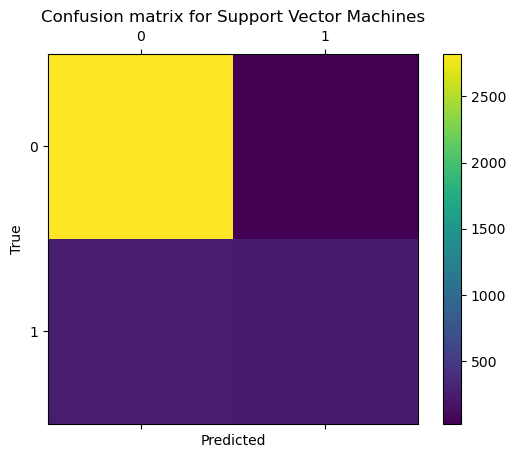

[[2824   26]
 [ 125  358]]


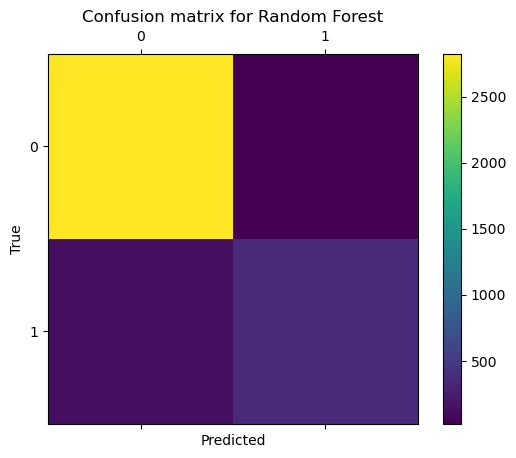

[[2810   40]
 [ 314  169]]


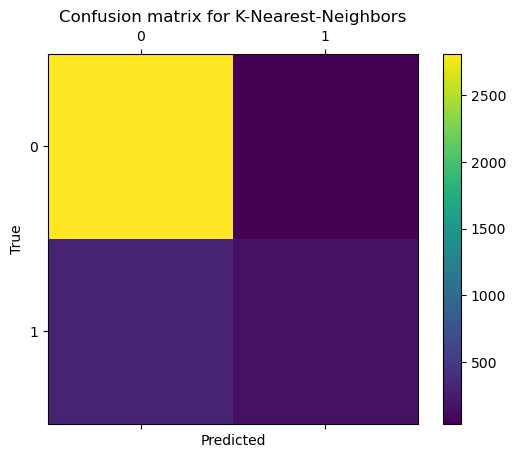

[[2810   40]
 [ 118  365]]


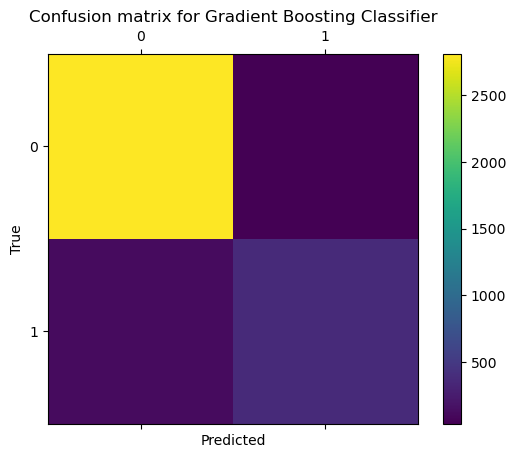

[[2770   80]
 [ 379  104]]


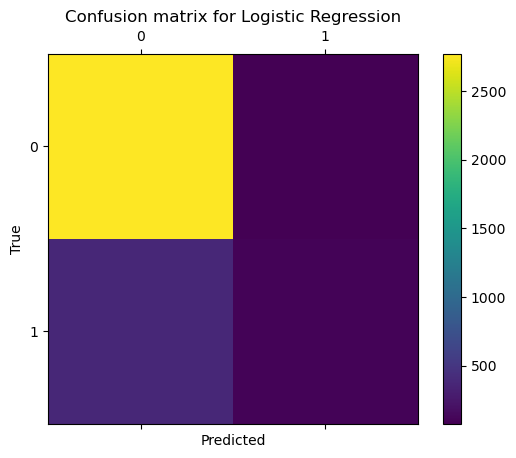

In [31]:
# Define a function to draw confusion matrices
def draw_confusion_matrices(confusion_matrices, class_names):
    
# Convert class_names to a list if it's not already
    class_names_list = class_names.tolist()
    
# Loop through each confusion matrix in the list
    for cm in confusion_matrices:

# Get the classifier and confusion matrix from the tuple
        classifier, cm = cm[0], cm[1]
        print(cm)

        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names_list)
        ax.set_yticklabels([''] + class_names_list)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Convert y to a numpy array
y = np.array(y)

# Get unique class names from y
class_names = np.unique(y)

# Initialize a confusion_matrices list to store confusion matrices
confusion_matrices = [
    ("Support Vector Machines", confusion_matrix(y, run_cv(X, y, SVC))),
    ("Random Forest", confusion_matrix(y, run_cv(X, y, RF))),
    ("K-Nearest-Neighbors", confusion_matrix(y, run_cv(X, y, KNN))),
    ("Gradient Boosting Classifier", confusion_matrix(y, run_cv(X, y, GBC))),
    ("Logistic Regression", confusion_matrix(y, run_cv(X, y, LR)))
]

# Call draw_confusion_matrices function 
draw_confusion_matrices(confusion_matrices, class_names)

# TP / FP 
# FN / TN

## AUC/ROC CURVE

#### ROC curve plots the true positives (sensitivity) vs. false positives (1 − specificity), for a binary classifier system as its discrimination threshold is varied. Since a random method describes a horizontal curve through the unit interval, it has an AUC of .5. 

#### Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

Support vector machines:


/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920

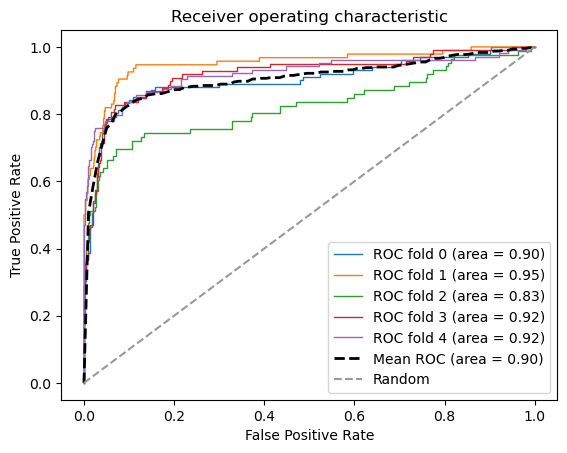

Random forests:


/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920

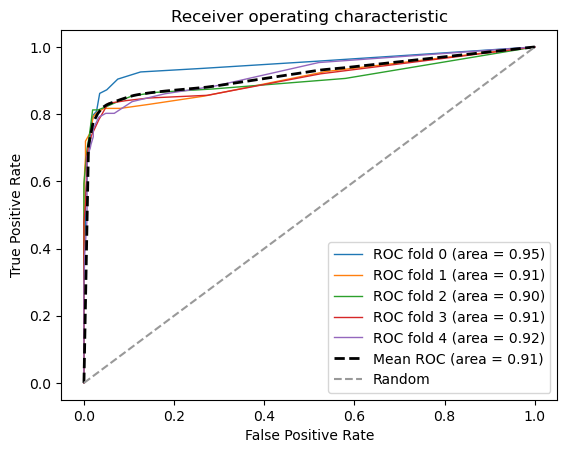

K-nearest-neighbors:


/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920

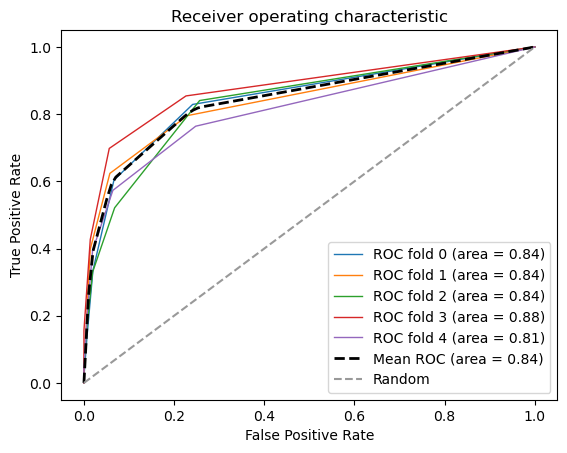

Gradient Boosting Classifier:


/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920055.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/nb/940mjrx16tl2wq4d__gpjxd00000gn/T/ipykernel_57739/1434920

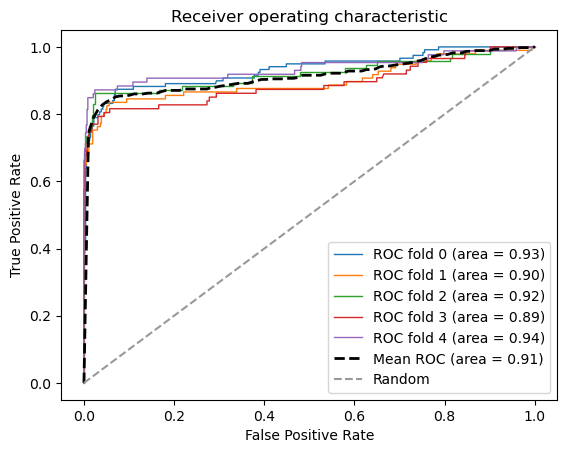

In [32]:
def plot_roc(X, y, clf_class, **kwargs):

# Set the number of folds for cross-validation
    n_folds = 5
    
# Initialize KFold cross-validator
    kf = KFold(n_splits=n_folds, shuffle=True)
    
# Create an array to store predicted probabilities
    y_prob = np.zeros((len(y), 2))

# Initialize variables for mean True Positive Rate (tpr) and mean False Positive Rate (fpr)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

# Create an empty list to store tpr values for each fold
    all_tpr = []
    
# Loop through each fold using enumerate to get fold index and split indices
# enumerate keeps track of the number of iterations (loops) in a loop
    for i, (train_index, test_index) in enumerate(kf.split(X)):  # Use kf.split(X) instead of kf
        
# Split the data into training and testing sets based on fold indices
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]

# Initialize a classifier instance with specified keyword arguments
        clf = clf_class(**kwargs)
    
# Fit the classifier on the training data
        clf.fit(X_train, y_train)
    
# Predict probabilities for the testing data
        y_prob[test_index] = clf.predict_proba(X_test)

# Calculate ROC curve values for the current fold
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])

# Interpolate the mean tpr using current fold's fpr and tpr values
        mean_tpr += interp(mean_fpr, fpr, tpr)

# Set the initial tpr value to 0.0
        mean_tpr[0] = 0.0

# Calculate the area under the ROC curve for the current fold
        roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the current fold
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

# Calculate the average tpr across all folds
    mean_tpr /= n_folds  # Use n_folds here instead of len(kf)
    
# Set the last tpr value to 1.0
    mean_tpr[-1] = 1.0
    
# Calculate the area under the mean ROC curve
    mean_auc = auc(mean_fpr, mean_tpr)
    
# Represents overall performance of the classifier across all folds in the cross-validation
# (BLACK LINE)
    plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


print("Support vector machines:")
plot_roc(X, y, SVC, probability=True)

print("Random forests:")
plot_roc(X, y, RF, n_estimators=18)

print("K-nearest-neighbors:")
plot_roc(X, y, KNN)

print("Gradient Boosting Classifier:")
plot_roc(X, y, GBC)

## Let's look at the Top 10 features in our dataset that contribute to customer churn:

In [33]:
train_index, test_index = train_test_split(churn_df.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. State (0.150721)
2. Account Length (0.130538)
3. Area Code (0.077845)
4. Phone (0.072635)
5. Int'l Plan (0.069782)
6. VMail Plan (0.032747)
7. VMail Message (0.030682)
8. Day Mins (0.029351)
9. Day Calls (0.027802)
10. Day Charge (0.022543)


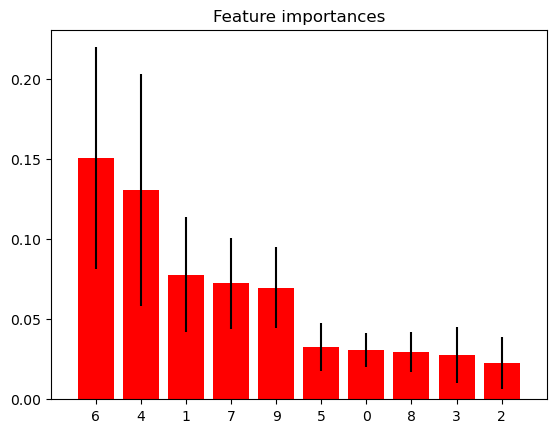

In [34]:
# Plot the feature importance of the forest
# import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [35]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True)
    y_prob = np.zeros((len(y), 2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)

# Get the predicted churn probabilities for class 1
pred_churn = pred_prob[:, 1]

# Create a boolean array indicating whether the target is churn (1)
is_churn = y == 1

# Calculate the number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)
counts[:]

# Create a defaultdict to store true probabilities
true_prob = defaultdict(float)

# calculate true probabilities
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    
# Convert true_prob to a pandas Series
true_prob = pd.Series(true_prob)


# Concatenate counts and true_prob along columns and reset the index
counts = pd.concat([counts, true_prob], axis=1).reset_index()

# Rename columns to appropriate names
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,1722,0.027294
1,0.1,757,0.026420
2,0.2,275,0.043636
3,0.3,108,0.194444
4,0.8,85,0.941176
5,0.9,81,0.987654
6,0.4,78,0.358974
7,0.7,69,0.898551
8,0.6,57,0.929825
9,1.0,52,1.000000


#### As predicted probabilities increase, the true probability of churn also generally increases. For instance, when the predicted probability is around 0.9, the true probability of churn is close to 98.77%, indicating that the model's predictions for this group are quite accurate

#### The alignment between predicted probabilities and true probabilities can provide insights into the calibration of the model. If the model's predicted probabilities are close to the true probabilities, it suggests that the model is well-calibrated.

#### The table helps us understand how the model's predictions can be used in practice. For instance, if you want to target high-churn-risk customers for intervention, focusing on instances with predicted probabilities above a certain threshold (e.g., 0.8) could yield high accuracy and a high proportion of actual churn cases.